In [1]:
import numpy as np

In [2]:
spreads = [61, 367]
nu = [53.0, 5.14]

In [3]:
quantile_levels = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999, 0.9999]

In [4]:
CVA0 = np.array([18.48, 14.74, 12.95, 11.60, 10.37, 9.15, 7.86, 6.42, 4.64, 3.70, 2.36, 1.03, 0.53])
DVA0 = np.array([1.03, 1.06, 1.00, 0.90, 0.79, 0.66, 0.53, 0.38, 0.22, 0.15, 0.07, 0.03, 0.02])
KVA0 = np.array([27.48, 19.22, 14.85, 11.58, 8.88, 6.55, 4.51, 2.72, 1.19, 0.66, 0.19, 0.02, 0.00])
MLA0 = np.array([1.11, 1.05, 1.12, 1.22, 1.36, 1.54, 1.76, 2.07, 2.56, 2.90, 3.56, 4.72, 5.70])
MVA0 = np.array([0.66, 1.04, 1.44, 1.86, 2.32, 2.83, 3.43, 4.19, 5.32, 6.06, 7.47, 9.92, 11.98])

In [5]:
CVA1 = np.array([10.26, 8.27, 7.29, 6.54, 5.85, 5.17, 4.44, 3.63, 2.62, 2.09, 1.30, 0.53, 0.23])
DVA1 = np.array([6.31, 6.43, 6.01, 5.43, 4.76, 4.02, 3.23, 2.38, 1.43, 0.99, 0.49, 0.18, 0.14])
KVA1 = np.array([23.46, 16.53, 12.80, 10.00, 7.67, 5.66, 3.89, 2.35, 1.03, 0.57, 0.17, 0.01, 0.00])
MLA1 = np.array([0.96, 0.93, 0.99, 1.09, 1.22, 1.38, 1.58, 1.86, 2.31, 2.61, 3.20, 4.25, 5.13])
MVA1 = np.array([3.63, 5.77, 7.99, 10.33, 12.87, 15.71, 19.03, 23.24, 29.53, 33.65, 41.48, 55.11, 66.53])

In [6]:
CVA = [CVA0, CVA1]
DVA = [DVA0, DVA1]
KVA = [KVA0, KVA1]
FVA = [MLA0 + MVA0, MLA1 + MVA1]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')
sns.set_style("whitegrid")

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


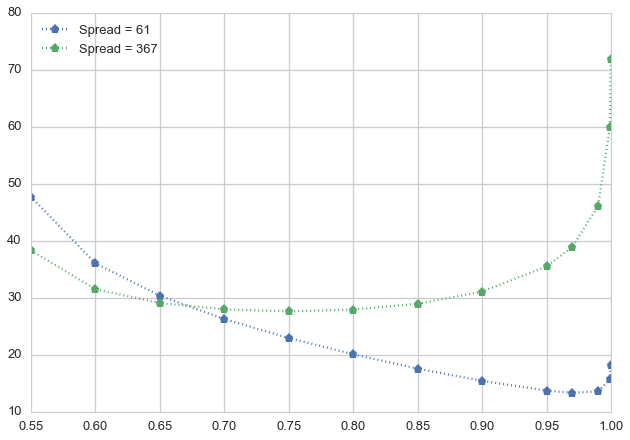

In [8]:
for i, s in enumerate(spreads):
    BVA = (CVA[i] + FVA[i] + KVA[i])
    plt.plot(quantile_levels, BVA, "p:", label='Spread = %i' % s)
    
plt.legend(loc='upper left')
plt.show()

In [9]:
from matplotlib.ticker import FuncFormatter

formatter = FuncFormatter(lambda y, pos: "%.0f %%" % (100 * y))

In [10]:
index = 0

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


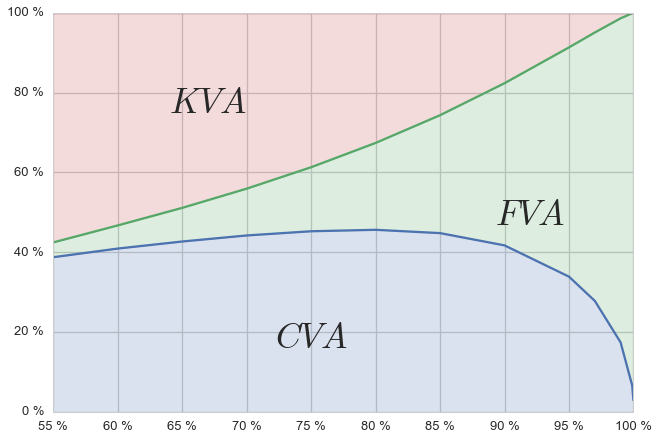

In [11]:
tva = (CVA[index] + FVA[index] + KVA[index])
frac_cva = np.divide(CVA[index], tva)
frac_cva_p_fva = np.divide(CVA[index] + FVA[index], tva)

palette = sns.color_palette(None, 3)
sns.set_palette(palette)

alpha = 0.2

fig, ax = plt.subplots(1)

ax.plot(quantile_levels, frac_cva)
ax.plot(quantile_levels, frac_cva_p_fva)
ax.plot(quantile_levels, map(lambda x: 1., quantile_levels))

ax.fill_between(quantile_levels, 0., frac_cva, where = frac_cva >= 0., 
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.75, 0.16, r"$CVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva, frac_cva_p_fva, where = frac_cva_p_fva >= frac_cva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.92, 0.47, r"$FVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva_p_fva, 1.0, where = 1. >= frac_cva_p_fva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.67, 0.75, r"$KVA$", horizontalalignment='center', fontsize=35)

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

plt.show()

In [12]:
index = 1

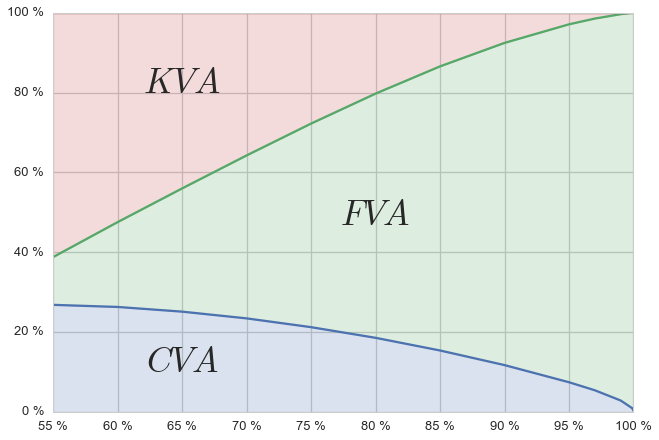

In [13]:
tva = (CVA[index] + FVA[index] + KVA[index])
frac_cva = np.divide(CVA[index], tva)
frac_cva_p_fva = np.divide(CVA[index] + FVA[index], tva)

palette = sns.color_palette(None, 3)
sns.set_palette(palette)

alpha = 0.2

fig, ax = plt.subplots(1)

ax.plot(quantile_levels, frac_cva)
ax.plot(quantile_levels, frac_cva_p_fva)
ax.plot(quantile_levels, map(lambda x: 1., quantile_levels))

ax.fill_between(quantile_levels, 0., frac_cva, where = frac_cva >= 0., 
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.65, 0.1, r"$CVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva, frac_cva_p_fva, where = frac_cva_p_fva >= frac_cva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.80, 0.47, r"$FVA$", horizontalalignment='center', fontsize=35)

ax.fill_between(quantile_levels, frac_cva_p_fva, 1.0, where = 1. >= frac_cva_p_fva,
                interpolate=True, color=palette.pop(0), alpha=alpha)

ax.text(0.65, 0.80, r"$KVA$", horizontalalignment='center', fontsize=35)

ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

plt.show()